In [2]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import Counter

In [3]:
sandbox = pd.read_csv("data/easy_load.csv").drop("Unnamed: 0",axis=1)
sandbox.shape

/home/venugopal/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,8,9,10,23,25,26,27,28,29,30,31,32,35,37,39,40,42,43,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(109009, 50)

In [4]:
sandbox["Timestamp"]  = pd.to_datetime(sandbox["Timestamp"],format="%Y-%m-%d %H:%M:%S")
sandbox.set_index(["Timestamp"],inplace=True)
sandbox.sort_index()
sandbox.head(5)

,AI552051.754,AI552051.754_ALM,BACT.552051,BCMPLT.552051,CYCLE.552051,FAL552051.754,FI552051_718,FIC552051_718,FQI552051.718,HV552051.331,...,SSOALM.552051,TIC552051.616,VI552051.748,VI552051.748_ALM,WI552051.674,WI552051.675,ZS552051.737,ZS552051.740,ZS552051_753,labels
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-04-01 00:00:00,0.0851304903626442,Normal,Active,Active,0,off,0.0120094,12.0093,208.417,No Data,...,Normal,18.4833,0.838046,Normal,103.945,3726.58,No Data,No Data,No Data,0
2015-04-01 00:10:00,0.08541367948055267,Normal,Active,Active,0,off,0.0120094,12.0093,208.455,No Data,...,Normal,18.4854,0.353471,Normal,103.945,3726.92,No Data,No Data,No Data,0
2015-04-01 00:20:00,0.08569687604904175,Normal,Active,Active,0,off,0.0120094,12.0093,208.492,No Data,...,Normal,18.4875,0.299794,Normal,103.945,3727.26,No Data,No Data,No Data,0
2015-04-01 00:30:00,0.08598006516695023,Normal,Active,Active,0,off,0.0120094,12.0093,208.53,No Data,...,Normal,18.4896,0.129283,Normal,103.945,3727.6,No Data,No Data,No Data,0
2015-04-01 00:40:00,0.0862632542848587,Normal,Active,Active,0,off,0.0120094,12.0093,208.568,No Data,...,Normal,18.4916,0.151732,Normal,103.945,3727.94,No Data,No Data,No Data,0


<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2017-04-27 00:00:00


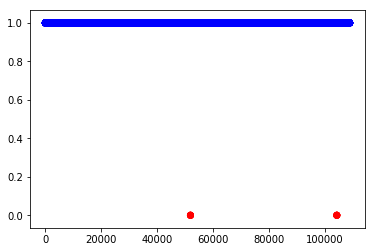

Counter({1: 108996, 0: 12})

In [5]:
def plot_missing_times(table,start,end):
    st = start
    ll = []
    while st < end:
        if st in table:
            ll.append(1)
        else:
            ll.append(0)
        st+=timedelta(minutes=10)
    plt.scatter(np.arange(len(ll)),ll,color=["red" if k==0 else "blue" for k in ll])
    plt.show()
    return ll
    
st = sandbox.index[0]
en = sandbox.index[-1]
print(type(st),en)
Counter(plot_missing_times(sandbox.index,st,en))

/home/venugopal/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


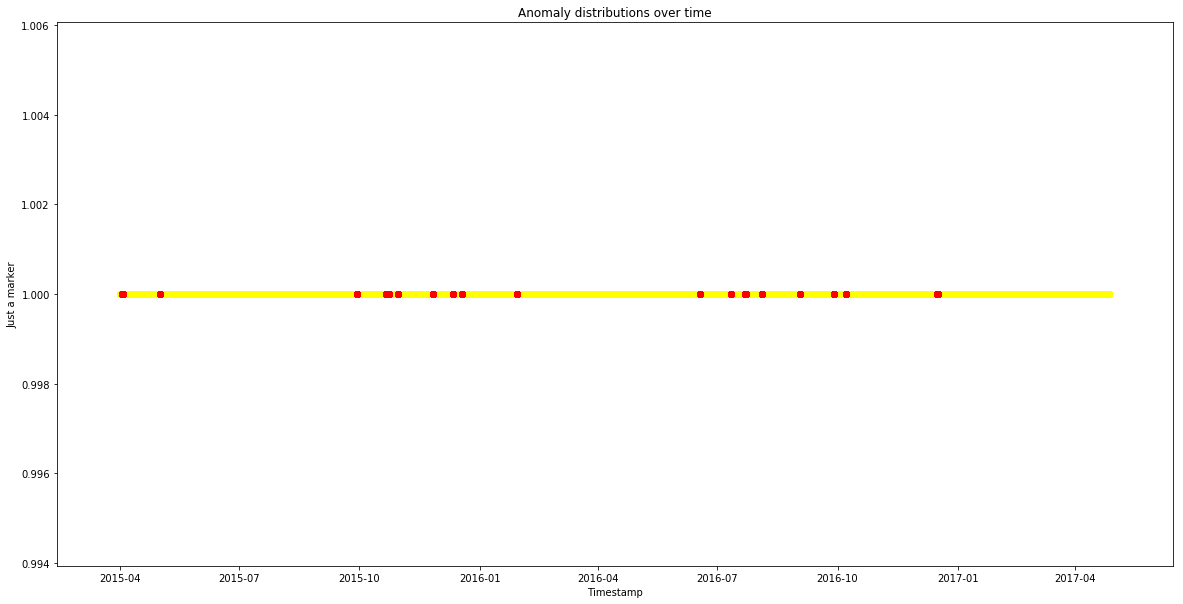

In [6]:
def plot_failures():
    plt.figure(figsize=(20,10))
    plt.scatter(sandbox.index,[1 for _ in range(len(sandbox))],color="yellow")
    fail_piece = sandbox[sandbox.labels > 0]
    plt.scatter(fail_piece.index,[1 for _ in range(len(fail_piece))],color="red")
    plt.title("Anomaly distributions over time")
    plt.xlabel("Timestamp")
    plt.ylabel("Just a marker")
    plt.savefig("Timeline plot for failures.png")
    plt.show()

plot_failures()

(65809, 49)
(43201, 49)


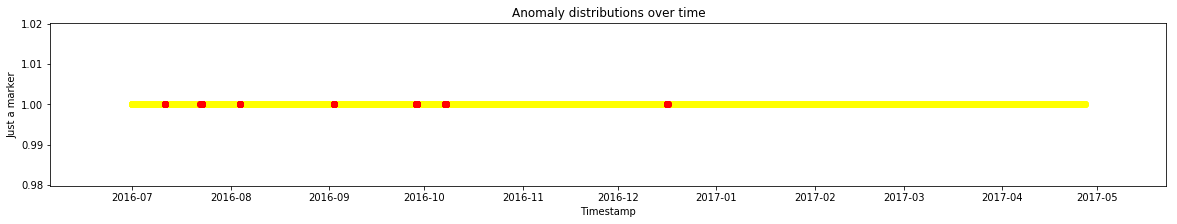

In [7]:
# Use the visual representation to make a feasible train-test split : 2016-04-30

marked_index = datetime.strptime("2016-07-01 00:00:00","%Y-%m-%d %H:%M:%S")
train = sandbox.loc[:marked_index]
test = sandbox.loc[marked_index:]

print(train.shape)
print(test.shape)

def plot_test_failures():
    plt.figure(figsize=(20,3))
    plt.scatter(test.index,[1 for _ in range(len(test))],color="yellow")
    fail_piece = test[test.labels > 0]
    plt.scatter(fail_piece.index,[1 for _ in range(len(fail_piece))],color="red")
    plt.title("Anomaly distributions over time")
    plt.xlabel("Timestamp")
    plt.ylabel("Just a marker")
    plt.savefig("Timeline plot for Anomalies in Test data.png")
    plt.show()

plot_test_failures()